# Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации. 
Нужно изучить рынок российского кинопроката и выявить текущие тренды. Нужно уделить внимание фильмам, которые получили государственную поддержку и ответить на вопрос, насколько такие фильмы интересны зрителю. 
Данные опубликованны на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

**Задачи**:
1. Предобработка данных: ознакомление, очистка, работа с типами данных.
2. Ислледовательский анализ: поиск закономерностей и тенденций по всему фрейму данных.
3. Исследовательский анализ: поиск закономерностей и тенденций фильмов с государственной поддержкой. Ответ на вопрос, насколько такие фильмы интересны зрителю.
4. Сделать выводы по состоянию российского рынка кинопроката и по картинам, профинансированных государством.

**Описание данных**

Таблица ***mkrf_movies*** содержит информацию из реестра прокатных удостоверений.
- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.

Таблица ***mkrf_shows*** содержит сведения о показах фильмов в российских кинотеатрах.
- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

### Изучение общей информации и объединение таблиц


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    data_movies = pd.read_csv('/datasets/mkrf_movies.csv')
except:
    data_movies = pd.read_csv('C:\\Users\\Killap\\project_study\\study_files\\mkrf_movies.csv')

try:
    data_shows = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    data_shows = pd.read_csv('C:\\Users\\Killap\\project_study\\study_files\\mkrf_shows.csv')
display(data_movies.info())
display(data_shows.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

In [2]:
#преобразовываем столбец в числовой тип
data_movies['puNumber'] = pd.to_numeric(data_movies['puNumber'], errors='coerce')

#удаляем получившийся пропуск и приводим тип данных к int
data_movies.dropna(axis='index', subset=['puNumber'], inplace = True)
data_movies['puNumber'] = data_movies['puNumber'].astype(int)

#объединяем таблицы в одну, в приоритете данные из data_movies
data = data_movies.merge(data_shows, on='puNumber', how='left')

#проверяем
data.info()

#сохраняем количество строк в датафрейме перед работой по очистке данных 
data_shape = data.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [3]:
#переименуем столбец, чтобы выглядел по всем правилам стиля
data = data.rename(columns={'puNumber':'pu_number'})

###  Предобработка данных

####  Проверяем типы данных


In [4]:
display(data.head(15))
display(data.tail(15))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7470,Реальная любовь в Нью-Йорке,121038219,2019-12-19T12:00:00.000Z,Художественный,"Креатив Энлэйнс, Арт, Копенгаген Филм, Дет Дан...",Дания - Канада - Швеция - Франция - Германия -...,Лоне Шерфиг,"Малене Бленков, Сандра Каннингэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,драма,3143790.50
7471,Черное Рождество,121038319,2019-12-19T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Блюмхауз Продакшнз, Дивид/К...",США - Новая Зеландия,Софи Такал,Джесси Хендерсон,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,3.9,"ужасы,триллер,детектив",18001772.43
7472,Ходячий замок,124010519,2019-12-19T12:00:00.000Z,Анимационный,"Студио Гибли, Буена Виста Хоум Интертейнмент, ...",Япония,Хаяо Миядзаки,"Томохико Исии, Хаяо Миядзаки, Тосио Судзуки",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.3,"аниме,мультфильм,фэнтези",NaN
7473,Вторжение,111022519,2019-12-23T12:00:00.000Z,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN
7474,Папа,111022919,2019-12-24T12:00:00.000Z,Художественный,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",Россия,К.Чувикова,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.2,драма,NaN
7475,Я свободен,111023019,2019-12-26T12:00:00.000Z,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN
7476,Тридцать,121038419,2019-12-26T12:00:00.000Z,Художественный,Демнехст ауф видео,Германия,Симона Костова,Джейлан Атаман-Джека,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,драма,NaN
7477,(Не)идеальный мужчина,111023119,2019-12-24T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,40000000.0,60000000.0,150147502.0,Фонд кино,4.5,"комедия,фантастика,мелодрама",NaN
7478,Эколав,111023219,2019-12-26T12:00:00.000Z,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7479,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23T12:00:00.000Z,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,219569.00


Два столбца требуют измнения типов данных: 
- ***show_start_date*** на корректный тип даты
- ***ratings*** на тип данных float

Конечно хотелось бы ещё в столбцах refundable_support, nonrefundable_support, budget изменить тип данных на int, но там присутствуют пропуски. 

In [5]:
#дату переводим в корректный тип
data['show_start_date'] = pd.to_datetime(data['show_start_date'])

#проверяем уникальные значения в столбце с рейтингом, так как при первой попытке изменить тип данных выдавалась ошибка
display(data['ratings'].unique())
#убираем знак процента
data['ratings'] = data['ratings'].str.replace('%', '')
#переводим в другой тип данных
data['ratings'] = data['ratings'].astype('float64')
#проверяем
display(data['ratings'].unique())


array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

array([ 7.2,  6.6,  6.8,  7.7,  8.3,  8. ,  7.8,  8.1,  7.1,  6. ,  7.4,
        5.8,  8.7,  6.3,  6.9,  5. ,  4.3,  7.3,  7. ,  6.4,  nan,  8.2,
        7.5,  6.7,  7.9,  5.9,  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,
        8.5,  8.8,  5.5,  5.1,  5.7,  5.4, 99. ,  4.4,  4.5,  5.3,  4.1,
        8.4,  2.6,  3.8,  4.6,  4.8,  4. ,  3. ,  1.6,  4.2,  5.2,  4.7,
        4.9,  3.9,  2.7,  3.3,  2.9, 28. ,  3.7,  1.4,  3.1, 97. ,  3.5,
        3.2,  2.8,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6, 83. , 64. ,
       91. , 94. , 62. , 79. , 90. , 19. , 88. ,  1. , 89. ,  1.3,  1.9,
        1.8,  1.2,  1.7,  9. , 98. ,  8.9,  9.1])

Процент убрали и перевели в корректный тип данных, но там, где был убран процент, остались некорректные данные. Будем считать, что процентный рейтинг - это процент от максимального оценочного балла - 10. Поэтому разделим на 10 все рейтинги, которые были записаны в процентах. 

In [6]:
data.update(data[(data['ratings'] > 10)]['ratings']/10)
data['ratings'].unique()


array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

#### Изучаем пропуски в датафрейме


Посмотрим количество пропусков и их процент от общего числа.

In [7]:
display(data.isna().sum())
display((data.isna().sum()/len(data)).round(4)*100)

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

title                     0.00
pu_number                 0.00
show_start_date           0.00
type                      0.00
film_studio               0.24
production_country        0.03
director                  0.12
producer                  7.59
age_restriction           0.00
refundable_support       95.56
nonrefundable_support    95.56
budget                   95.56
financing_source         95.56
ratings                  12.91
genres                   13.03
box_office               57.81
dtype: float64

1. *film_studio*, *director*, *producer*.  Часто пропуски есть в фильмах-концертах, так как там не всегда известен и понятен режиссер или продюссер.Студия-производитель часто отсутствует у небольших и локальных фильмов. В этих столбцах мало пропусков и в принципе их можно поискать в открытых источниках, таких как Кинопоиск. Предполагаю, что пропуски связаны с отсутствием единого стандарта заполнения карточки прокатного удостоверения на сайте МинКульта или с предоставлением не полной информации со стороны кинопроизводства. В пропусках поставим "unknown"


In [8]:
data[['film_studio','director','producer']] = data[['film_studio','director','producer']].fillna('unknown')
data[['film_studio','director','producer']].isna().sum()

film_studio    0
director       0
producer       0
dtype: int64

2. *production_country*. Два пропуска. Захотелось их заполнить, данные есть на сайте Кинопоиск.

In [9]:
display(data.loc[data['production_country'].isna()])
data.loc[3185, 'production_country'] = 'Россия'
data.loc[4440, 'production_country'] = 'Россия'
# проверяем
data['production_country'].isna().sum()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,unknown,NaN,unknown,unknown,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


0

3. *refundable_support*, *nonrefundable_support*, *budget*, *financing_source*.
Данные в этих столбцах предоставлены только для фильмов, получивших государственную поддержку, пропуски в этих четырех категориях должны совпадать по строкам, проверим это на тепловой карте ниже, бежевым цветом обозначены пропущенные значения, их более 95%.

Заполнять пропуски не имеет смысла.


<Axes: >

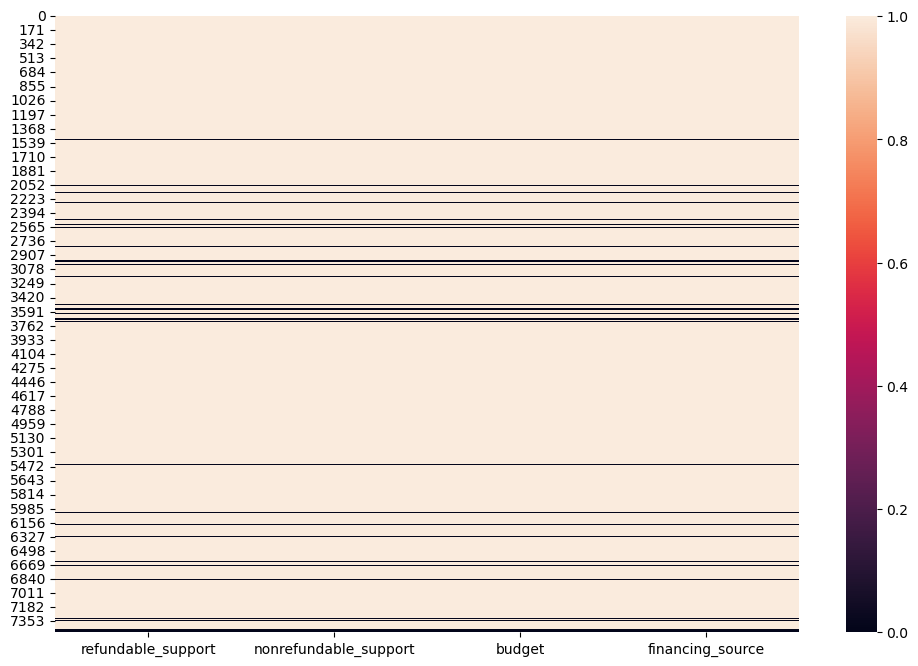

In [10]:
plt.figure(figsize = (12,8))
sns.heatmap(data[['refundable_support', 'nonrefundable_support', 'budget', 'financing_source']].isnull())

4. *ratings*.
Пропущенных значений около 13%.
Пропуски в данных могут быть из-за недостаточного количества рецензий на определенные фильмы на сайте Кинопоиск, поэтому рейтинг не сформировался. Заполнить пропуски не получится.

5. *genres*.
Пропущенных значений около 13%. Возможно при выгрузке данных прозошёл сбой. Заменим на "unknown".

In [11]:
data['genres'].fillna('unknown', inplace=True)
data['genres'].isna().sum()

0

6. *box_office*.
Пропущенных значений 57%. 
Возможно каких-то фильмов из таблицы вообще не было в прокате, поэтому нет и сборов. Ведь выдача прокатного удостоверения для фильма делается не только для показа в кинотеатрах, но и для выпуска фильма на материальном носителе и для показа фильма другими техническими способами.

#### Изучаем дубликаты

Проверим датафрейм на дублирование строк:

In [12]:
data.duplicated().sum()

0

Строки полнолностью не дублируются. Логично посмотреть дубликаты по прокатному удостоверению и названию.

In [13]:
data[data['pu_number'].duplicated(keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Мы видим, что два номера прокатного удостоверения (221154310) совпадают. Это действительно два разных фильма, но с одинаковым прокатным удостоверением. Возможно, роль сыграл человеческий фактор. Значит по сути это не дубликат, удалять его не будем.

Во второй паре такая же беда. Один номер прокатного удостоверения (221054410), но разные фильмы. Это заметно по названию, разному рейтингу и стране производства. Проверено по сайту Кинопоиск. Возможно тоже человеческий фактор, либо какой-то сбой. Это тоже не дубликат, удалять не будем. 

Проверим дубликаты по названию.

In [14]:
display(data['title'].duplicated().sum())

714

Их действительно много, но мы знаем, что прокатных удостоверений может быть несколько в зависимости от целей и прокатных сроков. А ещё названия у фильмов могут тоже быть одинаковыми, а ещё это могут быть ремейки одного и того же фильма, поэтому названия будут совпадать. Поэтому удалять их тоже не будем.  

#### Шаг 2.4. Изучаем категориальные значения

In [15]:
# смотрим на категориальные столбцы
display(data['genres'].unique())
display(data['type'].unique())
display(data['age_restriction'].unique())
display(data['production_country'].unique())

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'unknown', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комед

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

В столбце **age_restriction** проблем нет. В столбце **genres** большое количество уникальных значений, потому что у одного фильма часто есть несколько жанров, это решится в будущем созданием нового столбца.

В столбце **type** есть проблема с пробелом перед двумя значениями. Уберём их.

In [16]:
data['type'] = data['type'].str.lstrip()
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

В столбце **prodaction_country** есть проблема с пробелами и дефисами. Чтобы данные выглядили более единообразно, заменим их. 

In [17]:
data['production_country'].str.strip()
data['production_country'].replace('-',',', regex=True, inplace=True)
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия,Великобритания', 'Великобритания , Италия',
       'Чехословакия', 'США , Франция , Турция', 'Новая Зеландия',
       'Канада , Франция , Испания', 'США,Германия',
       'США , Великобритания', 'Великобритания', 'США , Германия',
       'Франция , Мексика , США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания,США,Германия,КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США , Франция', 'США , Япония , Франция , Великобритания',
       'Гонконг , Сингапур , Таиланд , Великобритания', 'США,Канада',
       'Франция , Италия , Великобритания , США', 'Франция , США',
       'Ирландия,Великобритания,Германия', 'Чехия', 'США,Австралия',
       'СССР, Финляндия', 'США,Франция,Великобритания,Австрия',
       'США , Бельгия', 'США , Ирландия , Великобритания',
       'Великобритания , США',
       'Люксембург , Нидерл

К сожалению убрать все пробелы не получится, иначе из Новой Зеландии, мы получим НовуюЗеландию. Поэтому пока оставим как есть. 

На следующем этапе мы создадим новый столбец с одной страной производства (первой в списке), это решит нашу проблемы с пробелами. 

#### Проверяем количественные значения

Рассмотрим значения столбцов:

In [18]:
data[['refundable_support', 'nonrefundable_support','budget','box_office']].agg(['count', 'mean', 'max', 'min'])

,refundable_support,nonrefundable_support,budget,box_office
count,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
max,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Имеет смысл сразу обратить внимание на  **budget**. Рассмотрим строки, где budget равен нулю. Так как такого не должно быть, если выдавалась любая материальная поддержка.

In [19]:
display(data.query('budget == 0'))

print(f'Количество строк, где бюджет равен 0: {len(data.query("budget == 0"))}')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Количество строк, где бюджет равен 0: 17


Обнаружили 17 строк с нулевым бюджетом, все они имеют возвратные/невозвратные средства поддержки от государства. Исправим данные. Сначала проверим зависимость бюджета от возвратной и невозвратной поддержки.

In [20]:
display(data['refundable_support'].corr(data['budget']))
display(data['nonrefundable_support'].corr(data['budget']))

0.6412236551080053

0.5941693326605133

Теперь, когда понимаем, что корреляция есть, заполним нулевой бюджет в зависимости от суммы поддержки.

In [21]:
#находим среднюю зависимость
budget_percent_mean = (data['refundable_support'].mean() + data['nonrefundable_support'].mean()) / data['budget'].mean()

#создаём функцию по замене значений
def fix_budget(row):
    if row['budget'] < (row['refundable_support'] + row['nonrefundable_support']):
        return (row['refundable_support'] + row['nonrefundable_support']) / budget_percent_mean
    return row['budget']

data['budget'] = data.apply(fix_budget, axis=1)

#проверяем корректность работы
data.query('budget > 2').sample(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6585,Крик тишины,111025918,2019-01-28 12:00:00+00:00,Художественный,"ООО ""Продюсерская компания Александра Литвинова""",Россия,"В.Потапов, А.Карелин",А.Литвинов,«6+» - для детей старше 6 лет,0.0,40000000.0,6.000000e+07,Министерство культуры,7.0,"драма,история,военный",1.042023e+06
5577,Временные трудности,111007517,2018-09-13 12:00:00+00:00,Художественный,"ООО ""Энджой Мувиз""",Россия,М.Расходников,"Г.Малков, В.Поляков, М.Кучмент",«12+» - для детей старше 12 лет,0.0,30000000.0,4.868086e+07,Фонд кино,6.1,"драма,мелодрама",9.623548e+07
7170,Грех,111014419,2019-08-31 12:00:00+00:00,Художественный,НО Фонд Андрея Кончаловского по поддержке кино...,"Россия, Италия",А.Михалков (псевдоним А.Кончаловский),НО Фонд Андрея Кончаловского по поддержке кино...,«16+» - для детей старше 16 лет,0.0,60000000.0,7.799420e+08,Министерство культуры,6.9,"драма,биография,история",5.424320e+07
7253,Герой,111015819,2019-09-26 12:00:00+00:00,Художественный,"ООО ""Карго""",Россия,К.Оганисян,К.Оганисян,«12+» - для детей старше 12 лет,20000000.0,100000000.0,2.500000e+08,Фонд кино,7.9,"фэнтези,боевик,драма",1.728713e+08
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,1.254619e+07,Министерство культуры,4.3,комедия,1.536293e+07
5851,СОБИБОР (SOBIBOR),111004318,2018-04-24 12:00:00+00:00,Художественный,"ООО ""Фонд национального кино ""Патриот""",Россия,"К.Хабенский, А.Малюков","Э.Айнулова, М.Журомская",«12+» - для детей старше 12 лет,0.0,60000000.0,2.985000e+08,Министерство культуры,6.4,"военный,драма",2.992602e+08
3384,О любви (2017),111018816,2016-12-28 12:00:00+00:00,Художественный,"ООО ""СТУДИЯ ""2-Б-2"" ИНТЕРТЭЙНМЕНТ""",Россия,В.Бортко,Н.Бортко,«16+» - для детей старше 16 лет,20000000.0,35000000.0,7.008644e+07,"Министерство культуры, Фонд кино",NaN,unknown,1.133241e+07
7475,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,4.615400e+07,Министерство культуры,5.9,драма,NaN
2540,Зеленая Карета,111009715,2015-06-01 12:00:00+00:00,Художественный,"ООО ""Пропеллер продакшн"", ООО ""Революция Фильм...",Россия,"С.Комаров, О.Асадулин","Р.Давлетьяров, А.Алькема, Г.Подземельный, В.Ма...",«16+» - для детей старше 16 лет,0.0,26950000.0,3.905797e+07,Министерство культуры,6.6,драма,2.325871e+06
3017,Богатырша,114003715,2015-12-23 12:00:00+00:00,Анимационный,"ООО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Гюлумян, В.Саргсян",«6+» - для детей старше 6 лет,15000000.0,15000000.0,6.204465e+07,Фонд кино,2.8,мультфильм,3.833450e+07


Я так же обратила внимание, что есть нулевые записи со сборами фильма и  решила посмотреть гистограмму **box_office**:

<Axes: >

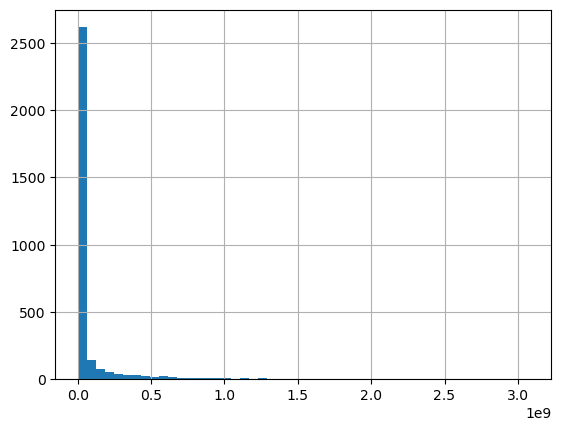

In [22]:
data['box_office'].hist(bins=50)

In [23]:
display(f'Количество фильмов, где сборы равны 0: {len(data.query("box_office == 0"))}')

display(f'Количество фильмов, где сборы меньше 2000 рублей: {len(data.query("box_office < 2000"))}')

'Количество фильмов, где сборы равны 0: 24'

'Количество фильмов, где сборы меньше 2000 рублей: 334'

 Так как записей без пропусков в этом столбце всего 3158, то некорректных записей оказывается около 10%. К этому мог привести неправильный вывод информации, может быть там не хватает нулей или произошёл какой-то сбой.

#### Добавляем новые столбцы





Создаем столбец с информацией о годе проката для дальнейшей работы с ним.

 ***Интересное наблюдение***

Хочется сразу оговориться, что **show_start_date** это не точная дата премьеры фильма. А скорее дата, когда получено прокатное удостоверение, так как оно не всегда получается именно для показа фильма в кинотеатре. Например, "Операция "Ы"" обозначена здесь 2013 годом, хотя год премьеры 1965, а в 2013 году было выдано прокатное удостоверение для показа на DVD и Blu-ray. Поэтому возникает вопрос, для чего именно здесь указаны данные (причем некорректные, потому что слишком маленькие) по сборам (**box_office**): это сборы от продажи на носителях или от повторного запуска в кино? 

In [24]:
# пример
data.query('pu_number == 111007413')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.7,"комедия,мелодрама,криминал",380.0


##### Столбец с годом проката

Продолжим работу с датой, выделим **год**.

In [25]:
data['year_start_date'] = pd.DatetimeIndex(data['show_start_date']).year

data.sample(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_start_date
4460,Симпсоны: В кино,224000410,2010-02-19 12:00:00+00:00,Анимационный,"Эком Продакшн Компани, Грацие Филмз, ХХ век Фокс",США,Дэвид Сильверман,"Ричард Сакай, Майк Скули, Крейг Сост",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.4,"мультфильм,комедия,приключения",NaN,2010
1938,Астерикс: Земля Богов,124003214,2014-11-21 12:00:00+00:00,Анимационный,"Эм 6 Студио, Белвижн, Грид Анимейшн, Националь...",Франция,"Александр Астье, Луис Клиши","Александр Астье, Луис Клиши",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.7,"мультфильм,приключения,фэнтези",2.464499e+06,2014
7300,Ночь живых мертвецов,121029119,2019-10-30 12:00:00+00:00,Художественный,"Имейдж Тен, Лаурель Групп, Маркет Скьяр Продак...",США,Джордж А.Ромеро,"Расселл Страйнер, Карл Хардмен",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.3,"ужасы,триллер",NaN,2019
3411,ХОЛОДНОЕ ТАНГО,111016916,2016-11-09 12:00:00+00:00,Художественный,"ООО ""Студия ""СЛОН""",Россия,П.Чухрай,С.Еремеева,«16+» - для детей старше 16 лет,0.0,35000000.0,95000000.0,Министерство культуры,6.3,"мелодрама,военный,драма",2.232926e+07,2016
4755,Контакт,221175710,2010-12-31 12:00:00+00:00,Художественный,Уорнер Бразерс,США,Роберт Земекис,"Стив Старки, Роберт Земекис",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.9,"фантастика,триллер,драма",NaN,2010
1981,Седьмой сын,121026614,2014-11-11 12:00:00+00:00,Художественный,"Леджендари Пикчерз, Мовинг Пикчерз Компани, Ут...","США , Великобритания , Канада , КНР",Сергей Бодров,"Бэзил Иваник, Томас Тулл, Лайонел Уигрэм",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.8,"фэнтези,приключения",1.016411e+09,2014
5226,38-я параллель,221059311,2011-04-27 12:00:00+00:00,Художественный,Кан Чжэ Гю Филм Компани,Республика Корея,Кан Чжэ Гю,Сем Хан Ли,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"военный,боевик,драма",NaN,2011
1138,Паркер,121000513,2013-01-11 12:00:00+00:00,Художественный,"Инсентив Филмид Интертейнмент, Сьерра/Эффинити...",США,Тэйлор Хэкфорд,"Лес Александр, Стив Чесмэн, Тейлор Хэкфорд",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,"боевик,триллер,криминал",NaN,2013
3744,Гиппопотам,121010917,2017-06-05 12:00:00+00:00,Художественный,"Электрик Шэдоу Компани, Трюффель Пикчерз",Великобритания,Джон Дженкс,"Алекса Селигман, Джей Тейлор",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,комедия,6.114615e+06,2017
6586,В Кейптаунском порту...,111026018,2019-02-06 12:00:00+00:00,Художественный,"ООО ""РЕНОВАЦИО интертейнмент""",Россия,А.Велединский,"В.Поляков, В.Игнатьев, Р.Дишдишян",«16+» - для детей старше 16 лет,0.0,35000000.0,120000000.0,Фонд кино,5.7,драма,1.590168e+06,2019


Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма для дальнейшей работы с ними. В столбцы войдут первые значения из списка режиссёров и жанров соответственно. 



##### Столбцы с главным режиссером и жанром

Напишем функцию для создания двух новых столбцов: 
- 'first_director' с именем и фамилией главного режиссера;
- 'first_genre' с основным жанром фильма.

In [26]:
def fix(string):
    string_list = string.split(sep=',')
    return string_list[0]

data['first_director'] = data['director'].apply(fix)
data['first_genre'] = data['genres'].apply(fix)

data.sample(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_start_date,first_director,first_genre
4250,Воробей-,111007310,2010-08-09 12:00:00+00:00,Художественный,"ООО ""Центр-Студия национального фильма ""XXI век""",Россия,Ю.Шиллер,"А.Гундоров, А.Малечкин, С.Линников",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.5,"боевик,триллер,драма",5.355000e+03,2010,Ю.Шиллер,боевик
2828,Жертвуя пешкой,121023215,2015-11-17 12:00:00+00:00,Художественный,"Гейл Кац Продакшнз, Материал Пикчерз, ПалмСтар...",США,Эдвард Цвик,"Гейл Кац, Тоби Магуайр, Эдвард Цвик",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"триллер,драма,биография",8.283641e+06,2015,Эдвард Цвик,триллер
5825,Тренер,111003218,2018-04-19 12:00:00+00:00,Художественный,"ООО ""ДК интертеймент"", ООО ""Киностудия ""Слово""...",Россия,Д.Козловский,"Д.Козловский, П.Ануров, Л.Верещагин, А.Златопо...",«12+» - для детей старше 12 лет,0.0,260000000.0,390191139.0,Фонд кино,6.8,"драма,спорт",8.205280e+08,2018,Д.Козловский,драма
3954,На ощупь,111007510,2010-08-13 12:00:00+00:00,Художественный,"ООО ""КИНОКОМПАНИЯ ВИЗАВИ""",Россия,Ю.Грымов,"Ю.Грымов, М.Бабаханов, И.Жуков",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.8,"драма,комедия,приключения",NaN,2010,Ю.Грымов,драма
3472,Афера по-английски,121003817,2017-02-27 12:00:00+00:00,Художественный,"Потбойлер Продакшнз, Филм Фо, Альберт Гранвиль...",Великобритания,Адам Смит,"Гэйл Иган, Андреа Колдервуд, Алистер Сиддонс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.6,"драма,криминал",1.837312e+06,2017,Адам Смит,драма
997,В белом плену,121011513,2013-04-25 12:00:00+00:00,Художественный,"Центропа Интернэшнл Норвегия, Еуроимаж, Филм Ф...","Норвегия , Швеция",Петер Несс,"Петер Ольбек Йенсен, Валери Саундерс",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.2,"драма,военный",NaN,2013,Петер Несс,драма
5456,Твое имя,124003017,2017-09-07 12:00:00+00:00,Анимационный,"Амьюз, Ансэр Стьюдио, Комикс Вэйв Филмз, Ист Д...",Япония,Макото Синкай,"Коитиро Ито, Норитака Кавагути, Гэнки Кавамура...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"аниме,мультфильм,фэнтези",3.416383e+07,2017,Макото Синкай,аниме
1699,Много шума из ничего /По одноименной пьесе Уил...,221048013,2013-12-09 12:00:00+00:00,Художественный,Бельведер Пикчерз,США,Джосс Уидон,"Кай Коул, Джосс Уидон",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,"драма,мелодрама,комедия",NaN,2013,Джосс Уидон,драма
5914,Крым. Крылья,112000318,2018-06-29 12:00:00+00:00,Документальный,"ООО ""ВВП Альянс""",Россия,А.Безрук,"А.Казанкова, М.Королев",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,unknown,NaN,2018,А.Безрук,unknown
5619,Несокрушимый,111011117,2018-02-22 12:00:00+00:00,Художественный,"ООО ""Пиманов и партнеры""",Россия,К.Максимов,"О.Погодина, А.Пиманов, Д.Анисимов",«12+» - для детей старше 12 лет,0.0,50000000.0,150000000.0,Министерство культуры,5.5,"военный,драма,история",2.535752e+08,2018,К.Максимов,военный


##### Столбец с долей государственной поддержки

Выше я уже делала что-то подобное, но там были средние показатели поддержки и общего бюджета (47.8 %). Мне кажется, что так результат немного реалистичнее. 

Здесь посчитаем долю уже с внесенными нами исправлениями в колонку **budget** для каждого фильма.  

In [27]:
data['ratio_support'] = ((data['refundable_support'] + data['nonrefundable_support'])/ data['budget']*100).round(1)

data.query('budget > 0')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_start_date,first_director,first_genre,ratio_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,2013,А.Атанесян,драма,33.4
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,unknown,2.814000e+04,2014,А.Якимчук,unknown,70.0
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,2013,Р.Давлетьяров,комедия,61.3
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.0
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05,2014,М.Угаров,драма,62.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,А.Кравчук,история,51.0
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,2019,Д.Шмидт,мультфильм,52.6
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,53.0
7475,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,65.0


**Вывод** 

На этом этапе мы:
1. Проверили данные на дубликаты и пропущенные значения. Ничего не удаляли, в некоторых столбцах заменили пропуски на "unknown".
2. Заменили типы данных для удобной работы.
3. Заменили нулевые значения в столбце **budget**.
4. Обнаружили странные значения в столбце **box_office**. 
5. Добавили новые столбцы.
6. Нашли общую долю государственной поддержки - 47.8 % и для каждого фильма. 

###  Исследовательский анализ данных


#### Анализ данных всех фильмов по годам

Для начала посмотрим количество фильмов, выходящих в прокат, и общее количество фильмов, для которых было выдано прокатное удостоверение за этот год. Для этого отсортируем таблицу, используя данные из столбца года выхода фильма(**year_start_date**) и количества сборов(**box_office**). Именно этот столбец указывает нам, что фильм был в прокате и собрал определенную сумму. 

In [28]:
number_movies = (data
    .pivot_table(index='year_start_date', values= ['title', 'box_office'], aggfunc='count')
    .sort_values(by='box_office')
    .rename(columns = {'box_office':'number_box_office', 'title':'total_movies'})
                )
number_movies

,number_box_office,total_movies
year_start_date,,
2010,105,985
2011,109,622
2012,128,593
2013,184,630
2014,279,806
2017,357,505
2015,465,705
2018,475,891
2016,526,818


Для наглядности создадим гистограмму только для фильмов, для которых указаны сборы. То есть для тех, что предположительно шли в кино.

Text(0, 0.5, 'Count')

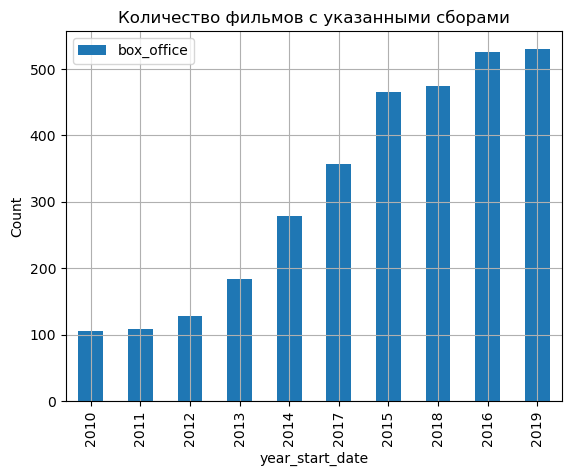

In [29]:
(
    data
    .pivot_table(index='year_start_date', values='box_office', aggfunc='count')
    .sort_values(by='box_office')
    .plot(kind='bar', grid=True)
)

plt.title('Количество фильмов с указанными сборами')
plt.ylabel('Count')

Выделим период, для которого указана информация в таблице: с 2010 года по 2019 год. 

**Меньше всего** информации по 2010 (105 фильмов) и 2011 (109 фильмов) годам. 
**Больше всего** информации по 2016 (526 фильмов) и 2019 (530 фильмов) годам. 

Выделим долю фильмов, которые вышли в прокат, по годам и от всех фильмов, указанных в таблице. 

In [30]:
number_movies['percent_box_office'] = ((number_movies['number_box_office'] / number_movies['total_movies']) * 100).round(1)
display(number_movies.sort_values(by='year_start_date'))
print(f'Доля фильмов, для которых есть сведения о прокате, составляет \
{(data["box_office"].count() / len(data) * 100).round(1)}%')

,number_box_office,total_movies,percent_box_office
year_start_date,,,
2010,105,985,10.7
2011,109,622,17.5
2012,128,593,21.6
2013,184,630,29.2
2014,279,806,34.6
2015,465,705,66.0
2016,526,818,64.3
2017,357,505,70.7
2018,475,891,53.3


Доля фильмов, для которых есть сведения о прокате, составляет 42.2%


Процент достаточно небольшой. Посмотрим как он менялся по годам более наглядно.

Text(0, 0.5, 'Percent')

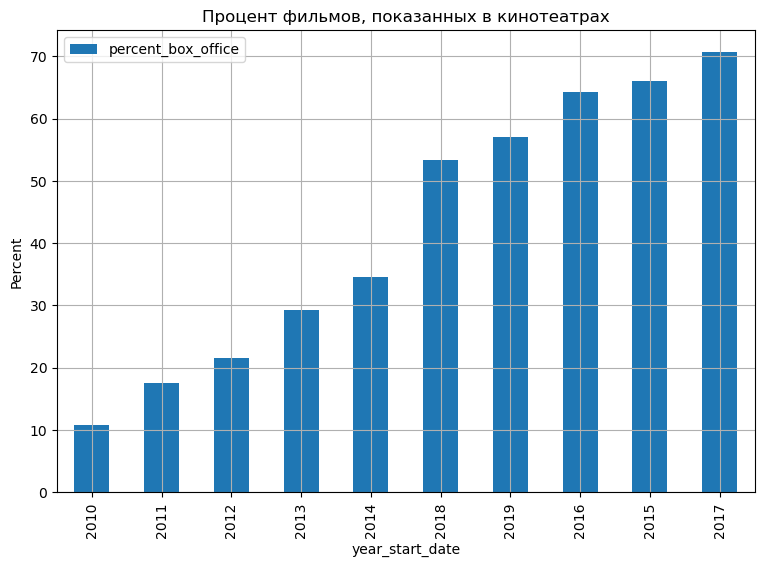

In [31]:
(
    number_movies
    .pivot_table(index='year_start_date', values='percent_box_office')
    .sort_values(by='percent_box_office')
    .plot(kind='bar', grid=True, figsize=(9,6))
)

plt.title('Процент фильмов, показанных в кинотеатрах')
plt.ylabel('Percent')

Самый низкий показатель фильмов, вышедших в прокат, по сравнению с количеством выданных прокатных удостоверений был **в 2010 году**.

Самый высокий показатель фильмов, вышедших в прокат, по сравнению с количеством выданных прокатных удостоверений был **в 2017 году**

Посмотрим наглядно соотношение фильмов, которые получили прокатное удостоверение, и фильмов, для которых зарегистрированы сборы. Сразу создадим условность, чтобы в дальнейшем не путаться в показаниях. Будем считать, что фильмы, для которых есть данные о сборах, показывались в кинотеатрах, а если данных о сборах нет, значит их не показывали в кино. 

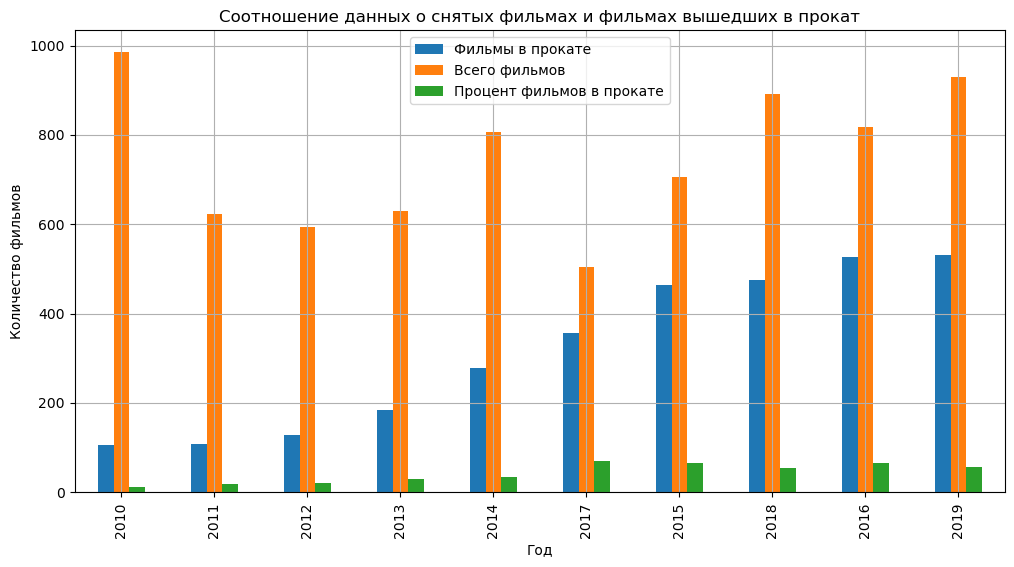

In [32]:
number_movies.plot(kind='bar', grid=True, figsize=(12,6))


plt.title('Соотношение данных о снятых фильмах и фильмах вышедших в прокат')
plt.ylabel('Количество фильмов')
plt.xlabel('Год')
plt.legend(['Фильмы в прокате', 'Всего фильмов', 'Процент фильмов в прокате'])

**Вывод**.

Изучив данные, можно сказать, что наиболее полная картина данных есть за 2017 год. Там наиболее близки друг к другу показатели выданных прокатных удостоверений и информация о сборах фильмов. И наиболее высокий процент фильмов в прокате соотвественно.


#### Анализ сборов всех фильмов по годам 

Изучим динамику сборов в прокате. Для начала посмотрим на цифры: год и сумму сборов.

In [33]:
(data
 .pivot_table(index='year_start_date', values='box_office', aggfunc='sum')
 .sort_values(by='box_office')
)

,box_office
year_start_date,
2010,2.428654e+06
2012,6.955423e+06
2011,1.410276e+07
2013,2.979971e+07
2014,7.444952e+09
2015,3.949737e+10
2016,4.786630e+10
2019,4.842571e+10
2017,4.856371e+10


Затем посмотрим на гистограмму.

Text(0.5, 0, 'Год')

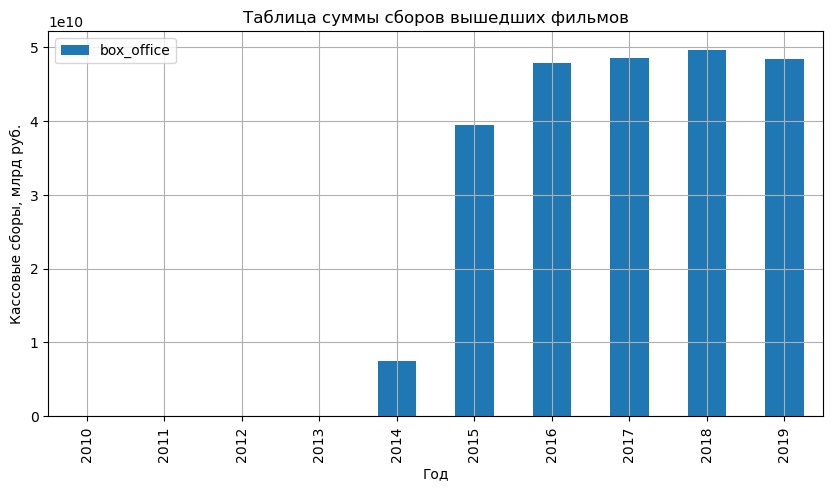

In [34]:
(
    data
    .pivot_table(index='year_start_date', values='box_office', aggfunc='sum')
    .plot(kind='bar', grid=True, figsize=(10,5))
)

plt.title('Таблица суммы сборов вышедших фильмов')
plt.ylabel('Кассовые сборы, млрд руб.')
plt.xlabel('Год')

Сделаем вывод, что самая *высокая* сумма сборов в **2018 году** - 49 668 400 000 млрд. рублей.
Самая *низкая* сумма сборов в **2010 году** - 2 428 654 млн. рублей.

В 2010-2013 годах действительно было меньше всего фильмов с информацией о сборах. Но также мы помним о том, что 10% данных **box_office** неправдоподобно низкие, может быть они сконцентрированы как раз в этих годах. Посмотрим на цифры. 

In [35]:
# возьмем, что неправдоподобно низкие сборы до 10000 рублей
data_wrong_box = data.query('box_office < 10000')
(
    data_wrong_box
    .pivot_table(index='year_start_date', values='box_office', aggfunc='count')
    .sort_values(by='box_office', ascending=False)
)

,box_office
year_start_date,
2013,125
2014,115
2010,85
2011,82
2012,78
2015,28
2016,23
2019,2
2017,1


И действительно увидим, что наибольшая концентрация таких ошибочных сборов в 2010-2014 годах. В 2018 году, где самые высокие сборы, вообще нет аномально низких цифр. 

##### Средняя и медианная сумма сборов для каждого года

,median,mean
,box_office,box_office
year_start_date,,
2010,1700.000,2.313004e+04
2011,3000.000,1.293832e+05
2012,5660.000,5.433924e+04
2013,3522.500,1.619549e+05
2014,18160.000,2.668442e+07
2015,4920933.000,8.494057e+07
2016,3846679.410,9.100057e+07
2017,9968340.000,1.360328e+08


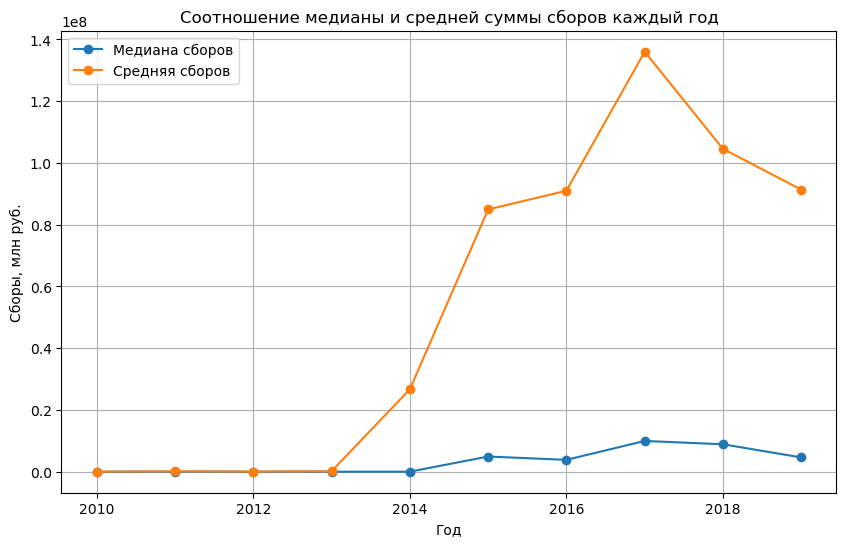

In [36]:
# сначала выведем сводную таблицу с медианой и средней
data_corr_box = data.pivot_table(index='year_start_date', values='box_office', aggfunc=['median', 'mean'])
display(data_corr_box)
# затем для наглядности выведем график
data_corr_box.plot(style='-o', grid=True, figsize=(10,6))


plt.title('Соотношение медианы и средней суммы сборов каждый год')
plt.ylabel('Сборы, млн руб.')
plt.xlabel('Год')
plt.legend(['Медиана сборов', 'Средняя сборов'])


В сводной таблице видим аномально низкие медианные значения, которые проверили на прошлом этапе. На графике можно увидеть большую разницу между медианным и средним значением, скорее всего в сборах есть очень высокие значения (выбросы единичных фильмов), которые повышают среднее. В итоге наиболее показательными годами для анализа сборов являются 2015-2019 года.

Несмотря на это, **пик** как в средней, так и в медиане по сборам приходится на **2017 год**. 
По **чистой сумме сборов** же лидировал **2018**.

#### Анализ влияния возрастного ограничения на сборы 

Используем для анализа данные 2015-2019 годов, так как выяснили ранее, что они наиболее показательны и не имеют странных низких значений. 

Text(0.5, 0, 'Год')

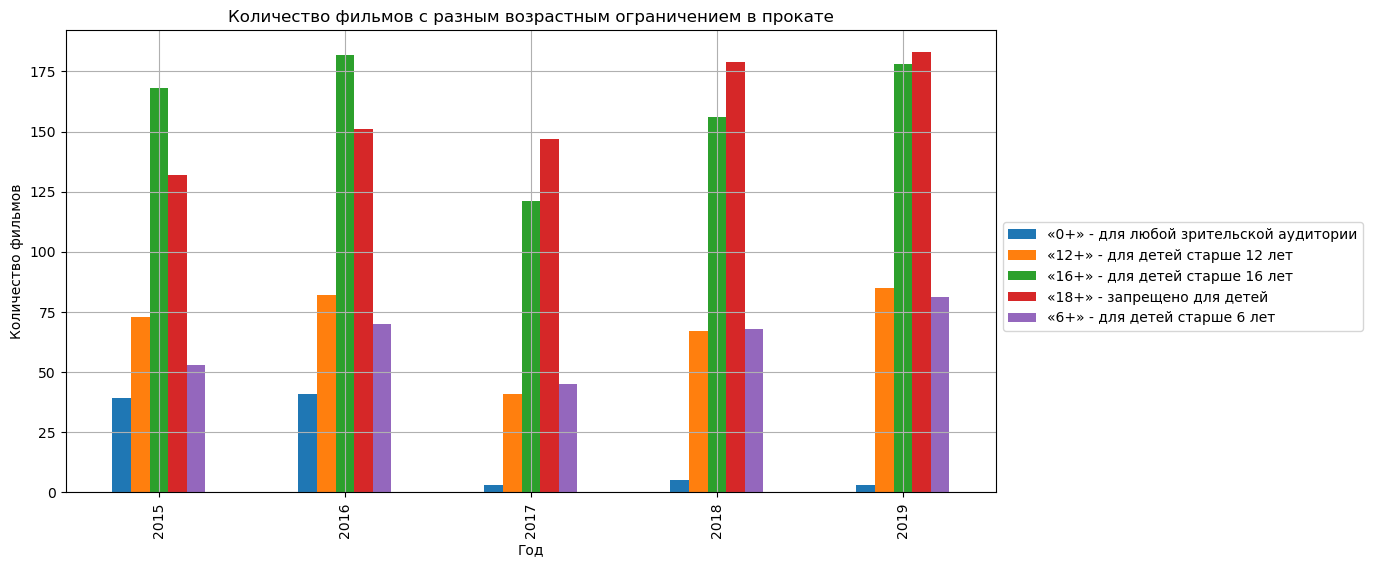

In [37]:
data_age = data.query('year_start_date >= 2015')
(
    data_age
    .pivot_table(index='year_start_date', values='box_office', columns='age_restriction', aggfunc='count')
    .plot(kind='bar', grid=True, figsize=(12,6))
    
)
plt.legend(bbox_to_anchor=(1, 0.6))
plt.title('Количество фильмов с разным возрастным ограничением в прокате')
plt.ylabel('Количество фильмов')
plt.xlabel('Год')


Большую долю в прокате заняли фильмы с возрастным ограничением "16+" и "18+". Далее почти одинаковые показатели у фильмов с рейтингом "12+" и "6+", на последней строчке фильмы с рейтингом "0+".

Посмотрим для начала на **сумму сборов** разных рейтингов. 

Text(0.5, 0, 'Год')

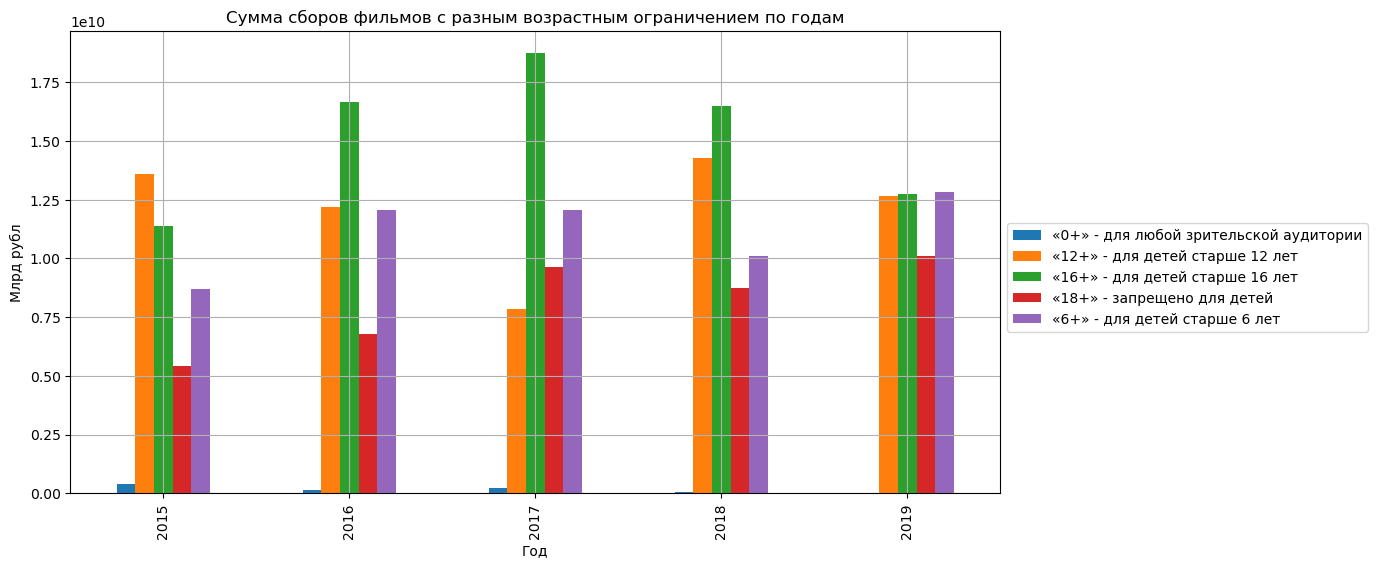

In [38]:
(
    data_age
    .pivot_table(index='year_start_date', values='box_office', columns='age_restriction', aggfunc='sum')
    .plot(kind='bar', grid=True, figsize=(12,6))
    
)
plt.legend(bbox_to_anchor=(1, 0.6))
plt.title('Сумма сборов фильмов с разным возрастным ограничением по годам')
plt.ylabel('Млрд рубл')
plt.xlabel('Год')


Фильмы с рейтингом **"16+"** имеют *самые большие сборы* (сумму) в прокате и лидируют на 2017 год - самый успешный по сборам год.

К 2017 году идет подъем в сборах фильмов с рейтингом **16+**, после 2017 года сумма сборов идёт на спад и почти сравнивается по сумме с фильмами с рейтингом 6+ и 12+. Это связано с тем, что самые кассовые фильмы были выпущены под рейтингом 16+ за этот период. А к 2019 кассовые сборы сравнялись. 

А теперь посмотрим на медиану сборов. Цифры будут отличаться за счёт выбросов - в списках есть очень кассовые фильмы и те, кто собрал мало. За счет этого медиана, сумма и средняя будут сильно отличаться.  

Text(0.5, 0, 'Год')

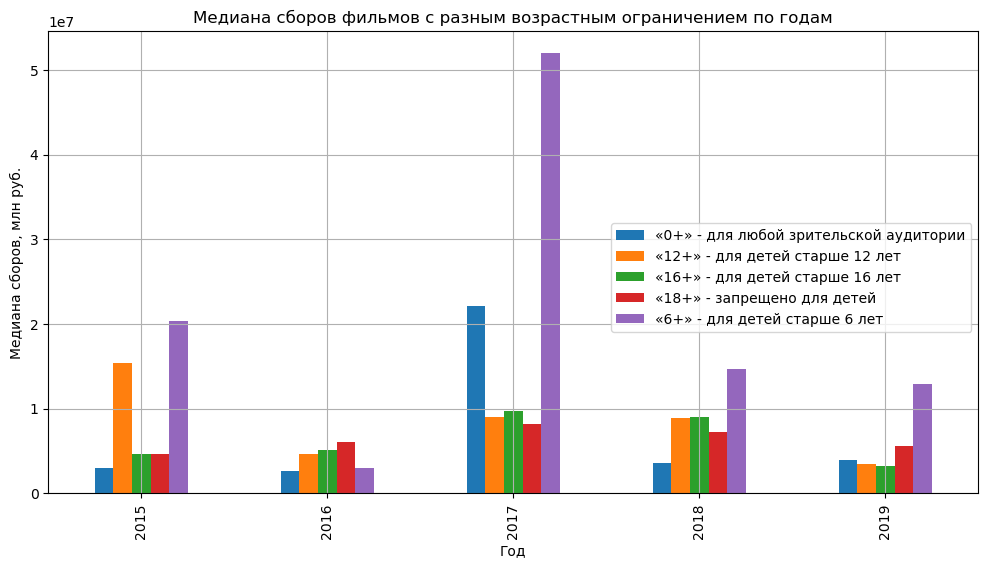

In [39]:
(
    data_age
    .pivot_table(index='year_start_date', values='box_office', columns='age_restriction', aggfunc='median')
    .plot(kind='bar', grid=True, figsize=(12,6))
    
)
plt.legend(bbox_to_anchor=(1, 0.6))
plt.title('Медиана сборов фильмов с разным возрастным ограничением по годам')
plt.ylabel('Медиана сборов, млн руб.')
plt.xlabel('Год')


Другая картина предстает по медиане. Пик медианы сборов всё также находится на 2017 году, но уже у рейтинга **6+**, то есть у семейных фильмов. Это значит, что в сборах рейтинга 16+ есть *выбросы* - фильмы с аномально большим количеством сборов, плюс фильмов с этим рейтингом в принципе снималось больше за этот период. 

Фильмов с рейтингом **6+**, во-первых, меньше снято, во-вторых, там нет больших выбросов и сборы отдельно взятых фильмов имеют одинаково высокое значение за 2017 год.

Посмотрим на средние значения. 

Text(0.5, 0, 'Год')

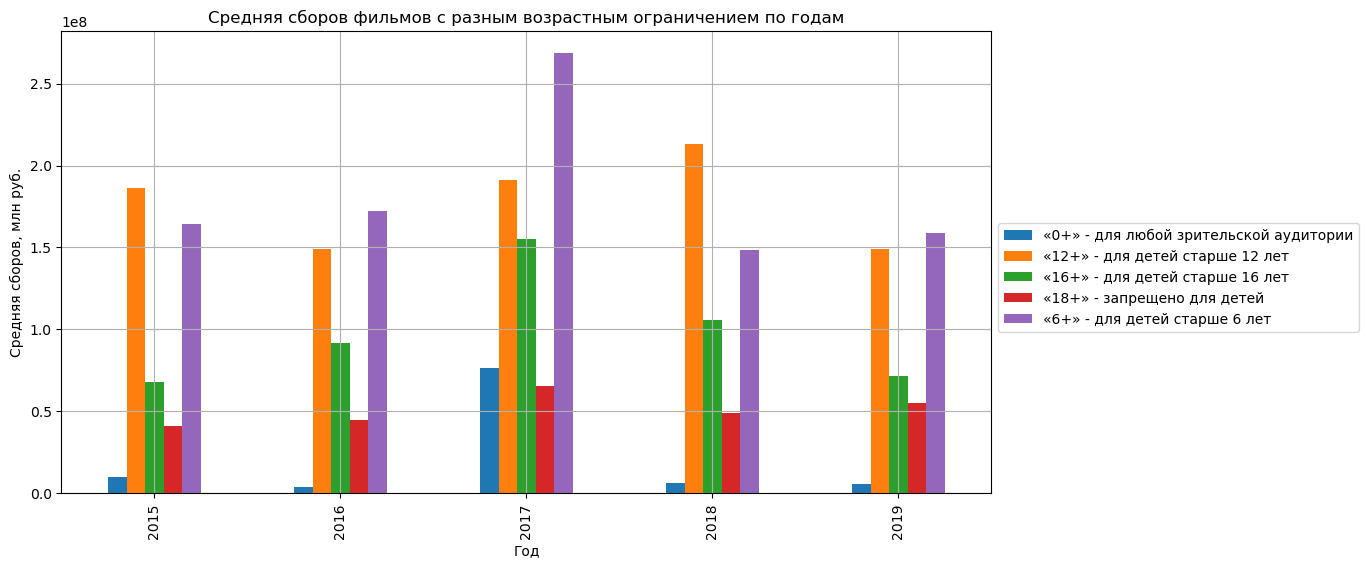

In [40]:
(
    data_age
    .pivot_table(index='year_start_date', values='box_office', columns='age_restriction', aggfunc='mean')
    .plot(kind='bar', grid=True, figsize=(12,6))
    
)
plt.legend(bbox_to_anchor=(1, 0.6))
plt.title('Средняя сборов фильмов с разным возрастным ограничением по годам')
plt.ylabel('Средняя сборов, млн руб.')
plt.xlabel('Год')

Средние значения подтверждают нашу теорию и лидерство на рынке проката с 2015 по 2019 занимают фильмы с рейтингом "6+" в 2017 году. 
Хотя здесь к ним неумолимо подбираются фильмы с рейтингом "12+".

### Исследование фильмов, которые получили государственную поддержку


#### Анализ количества фильмов с государственной поддержкой и их сборов

In [41]:
data_support = data.query('refundable_support > 0 or nonrefundable_support > 0')
data_not_support = data.loc[data.isna().any(axis=1)]
display(f'Количество фильмов без поддержки {len(data_not_support)}')
display(f'Количество фильмов c поддержкой {len(data_support)}')
# количество фильмов с поддержкой по годам
display(data_support.pivot_table(index='year_start_date', values=['refundable_support', 'nonrefundable_support'], aggfunc='count'))

display((len(data_support) / len(data))*100)



'Количество фильмов без поддержки 7182'

'Количество фильмов c поддержкой 332'

,nonrefundable_support,refundable_support
year_start_date,,
2013,2,2
2014,16,16
2015,86,86
2016,61,61
2017,41,41
2018,56,56
2019,70,70


4.435537742150968

In [42]:
#Средняя сумма выделенных возвратных средств
display((data_support['refundable_support'].mean()).round(2))
#Средняя сумма выделенных невозвратных средств
display((data_support['nonrefundable_support'].mean()).round(2))



11864457.83

48980988.89

Больше всего фильмов проспонсировалось в 2015 и 2019 годах. Всего **процент фильмов с поддержкой** составил 4% от общего числа выпущенных фильмов. 

Процент государственной поддержки от бюджета составлил 47,8 %

Средняя сумма выделенных возвратных средств составила 11,864,457 рублей

Средняя сумма выделенных невозвратных средств составила 48,980,988 рублей.

Видим, что невозвратных средств выделялось в разы больше. 

Посмотрим на окупаемость фильмов по годам. Для этого возьмём среднее значение бюджета и сборов. 

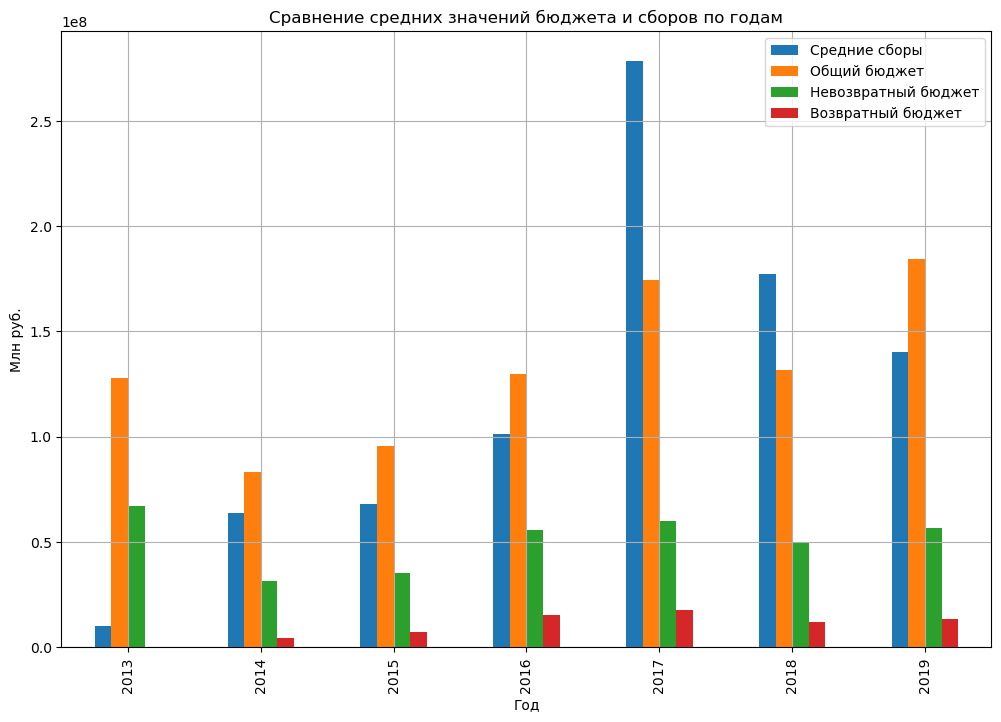

In [43]:
(
    data_support
    .pivot_table(index='year_start_date', values=['refundable_support', 'nonrefundable_support','box_office', 'budget'], aggfunc ='mean')
    .plot(kind='bar', grid=True, figsize=(12,8))
)

plt.title('Сравнение средних значений бюджета и сборов по годам')
plt.ylabel('Млн руб.')
plt.xlabel('Год')
plt.legend(['Средние сборы', 'Общий бюджет', 'Невозвратный бюджет', 'Возвратный бюджет'])

Видим, что бюджет обычно всегда превышает средние сборы, кроме 2017 года и 2018. Скорее всего там было один или несколько фильмов, которые собрали в прокате сразу большую кассу. Получается, что в основном фильмы с государственной поддержкой не окупаются. А если окупаются, то приносят мало прибыли. Хорошей прибылью считается, если фильм собрал в два раза больше, чем на него потратили. На графике мы такого не видим. 

#### Анализ рейтинга в фильмах с государственной поддержкой

Сравним медианные значения рейтингов фильмов с поддержкой и без неё, на которых было выдано прокатное удостоверение. 

In [44]:

display(data_support['ratings'].median())

display(data_not_support['ratings'].median())

6.2

6.6

Медианное значение рейтинга в фильмах с поддержкой - **6.2**

Медианное значение рейтинга в фильмах без поддержки - **6.6**

Рейтинг не сильно, но отличается: в фильмах без поддержки он выше. 

Теперь посмотрим как менялся медианный рейтинг с 2010 по 2019 годы

Text(0.5, 0, 'Год')

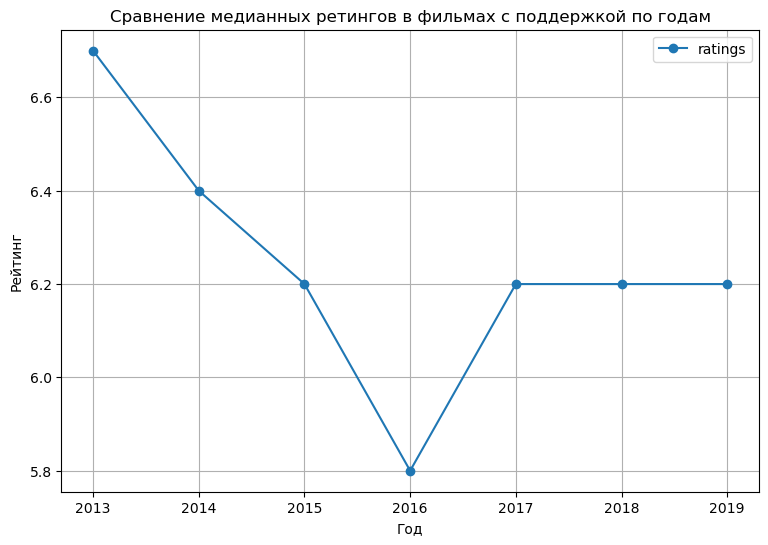

In [45]:
(
    data_support
    .pivot_table(index='year_start_date', values='ratings', aggfunc='median')
    .plot(style='-o', grid=True, figsize=(9,6))
)

plt.title('Сравнение медианных ретингов в фильмах с поддержкой по годам')
plt.ylabel('Рейтинг')
plt.xlabel('Год')

Самые *высокие рейтинги* у фильмов были в 2013 году - 6.8. Если считать, что этот год имеет всего 2 фильма с поддержкой, то это не сильно удивляет. 

В 2014 уже было снято 18 фильмов с поддержкой, поэтому рейтинг немного снизился до 6.4.

В 2015, 2016, 2019 годы было снято больше всего фильмов с поддержкой, лидеры - 2015 и 2019 имеют одинаковый медианный рейтинг в 6.2. 

2016 год имеет один или более неудачных фильмов, поэтому рейтинг резко снизился до 5.8. 

#### Анализ жанров и сборов фильмов с государственной поддержкой

Посмотрим каких жанров больше всего снималось в фильмах с государственной поддержкой. 

<Axes: xlabel='first_genre'>

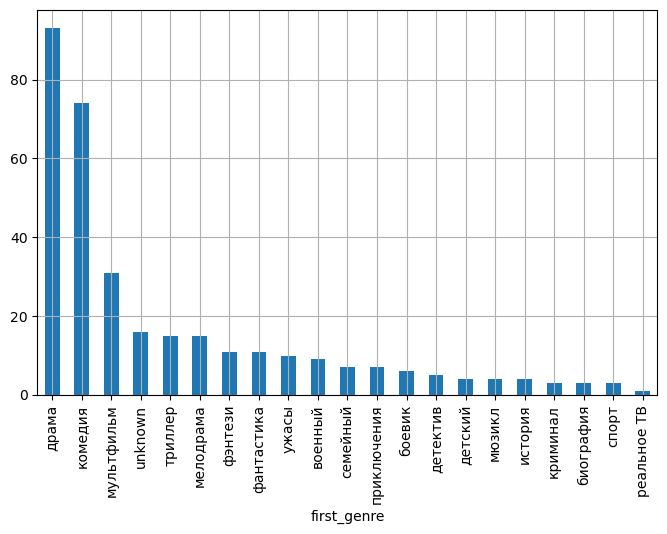

In [46]:
(
    data_support['first_genre']
    .value_counts()
    .plot(kind='bar', grid=True, figsize=(8,5))
)

Топ-3 жанров, в которых снялось самое большое количество фильмов:
1. Драма
2. Комедия
3. Мультфильм

Посмотрим какие жанры оказались наиболее прибыльными.

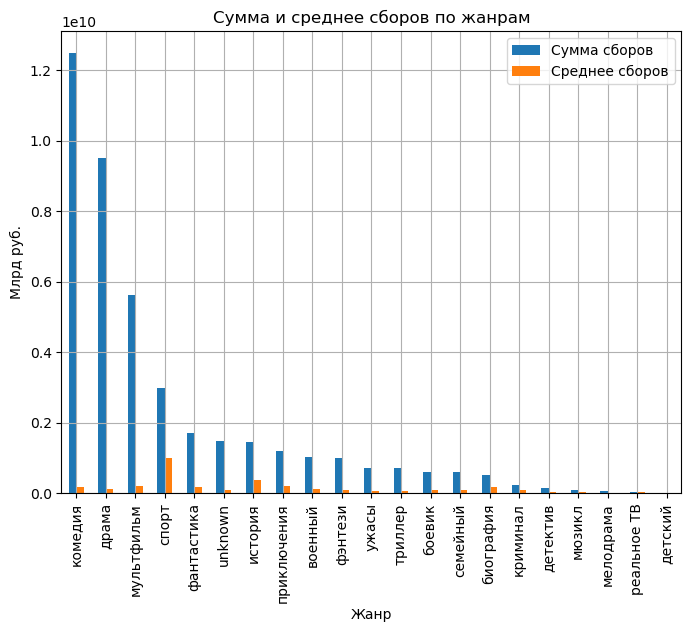

In [47]:

(
    data_support
    .pivot_table(index='first_genre', values='box_office', aggfunc=['sum', 'mean'])
    .sort_values(by=('sum', 'box_office'), ascending=False)
    .plot(kind='bar', grid=True, figsize=(8,6))
)

plt.title('Cумма и среднее сборов по жанрам')
plt.ylabel('Млрд руб.')
plt.xlabel('Жанр')
plt.legend(['Сумма сборов', 'Среднее сборов'])

По сумме сборов лидируют:
1. Комедия
2. Драма
3. Мультфильм

Сопоставимо с количеством снятых фильмов в этих жанрах. Да, они немного поменялись местами, но остались в топ-3. 

А по среднему немного другие результаты:
1. Спорт
2. История
3. Биография

Благодаря этому топ-3 мы узнали в каких жанрах были выбросы - фильмы, у которых были очень большие кассовые сборы. 

Давайте посмотрим в каких годах были такие выбросы.

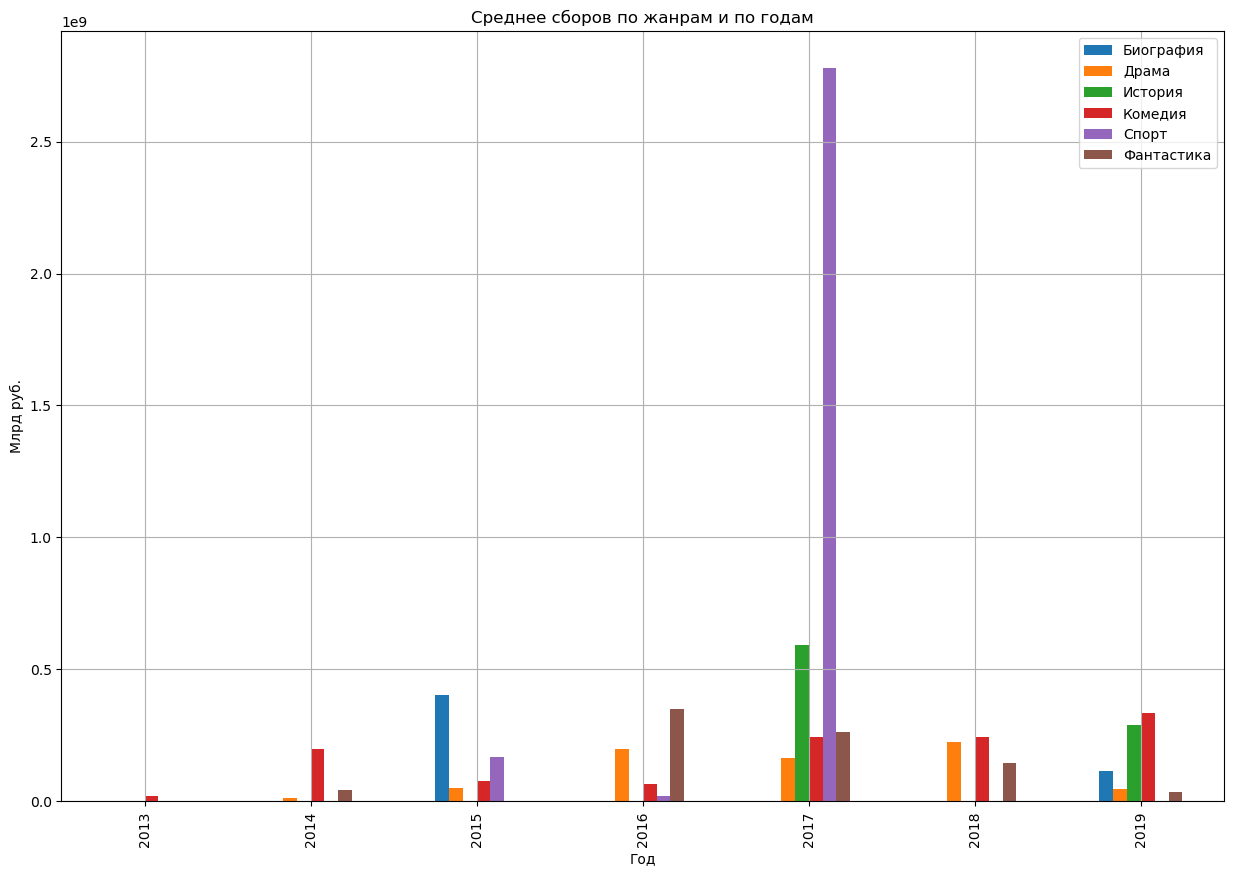

In [48]:
(
    data_support
    .query('first_genre == ["комедия", "драма", "спорт", "история", "фантастика", "биография"]')
    .pivot_table(index='year_start_date', values='box_office', columns='first_genre', aggfunc=['mean'])
    
    .plot(kind='bar', grid=True, figsize=(15,10))
)

plt.legend(bbox_to_anchor=(1, 0.6))
plt.title('Cреднее сборов по жанрам и по годам')
plt.ylabel('Млрд руб.')
plt.xlabel('Год')
plt.legend(['Биография', 'Драма', 'История', 'Комедия', 'Спорт','Фантастика'])

In [49]:
(
    data_support
    .query('year_start_date == 2017')
    .sort_values('box_office', ascending=False)['title']
    .head(10)     
)

5652                     Движение вверх
5504                 Последний богатырь
5640                         Ёлки Новые
5658    Три богатыря и принцесса Египта
5501                            Салют-7
5568                Легенда о Коловрате
3254                Время первых (2017)
5436                           Матильда
5515            Фиксики. Большой секрет
3320                        Крым (2017)
Name: title, dtype: object

И да, это наш 2017 - Движение вверх! Лидер по средним и медианным сборам, причем не только фильмов с государственной поддержкой. 
Можно сделать вывод, что иногда спонсируются действительно успешные картины. 

### Шаг 5. Общий вывод

В этом проекте был проанализирован рынок российского кинопроката, чтобы выявить определенные тенденции. 
Была проведена работа с данными:
- изучены пропуски;
- преобразованы некоторые типы данных для удобной работы;
- изучены дубликаты;
- изучены и отредактированы количественные и категориальные значения;
- добавлены новые столбцы.

После началась работа по анализу данных. Сначала общих данных о кинопрокате, затем частных данных о кинофильмов с государственной поддержкой. Были проанализированы сборы, жанры, рейтинги, количество фильмов. 

В результате сложилась некая картина. 

**Российский рынок кинопроката**.

Данные предоставлены с 2010 по 2019 годы. 
- *Количество фильмов*, для которых получено прокатное удостоверение: 7485
- *Данных по сборам*, то есть по фильмам, которые шли в кинотеатрах: 3158
- 42.2% фильмов от общего числа шли в кинотеатрах. 
- *Больше всего* фильмов *вышло в кинотеатрах* по сравнению со снятыми в 2017 году. 
- *Больше всего фильмов за весь период* выпущено в кинотеатрах в 2018-2019 годах.

- *Самая большая сумма сборов* была в 2018 году. Но *средняя и медианная* сборов находится на пике в 2017. 

- *По сумме сборов* лидирует ограничение по возрасту "16+" - этих фильмов снималось больше за период времени. Но по медиане и среднему лидируют фильмы с рейтингом "6+", с небольшим отставанием "12+" - с таким рейтингом были самые кассовые фильмы. И тоже в 2017 году. 

Таким образом самым успешным годом для российского кинопроката можно назвать 2017 год. Он часто лидирует по средним и медианным значениям.

Также можно сделать вывод, что данные с 2010 по 2014 заполнялись некоррректно. Прежде всего это отражается в данных о сборах. 

**Российский рынок кинопроката с государственной поддержкой**

- Больше всего фильмов проспонсировалось в 2015 и 2019 годах. **Процент фильмов с поддержкой** составил 4% от общего числа выпущенных фильмов. 

- *Процент государственной поддержки* от бюджета составлил 47,8 %

- Фильмы не окупились должным образом. Хотя в 2017 году средние сборы выше общего бюджета фильма, но для хорошей окупаемости фильм должен собрать в два раза больше, чем на него потратили.  

- *Рейтинги фильмов* с государственной поддержкой только немного ниже, чем без неё - 6.2. Самый неудачный год - 2016 -5.8. Далее медиана рейтингов держалась на одном уровне. 

- Самые *популярные жанры* у кинопроизводства и для спонсирования: драма, мультфильм и комедия, поэтому по сумме сборов эти три жанра также лидируют в фильмах с гос. поддержкой. 

- В среднем *самые прибыльные жанры* за период: спорт, история и биография. По ним были сняты самые кассовые фильмы, но единичные. 

- Самый успешный год для российского кинопроката: 2017 год. Лидер по средним и медианным сборам, были сняты самые кассовые фильмы, так же в этот год сборы были выше, чем затраченный бюджет. 

Таковы основные тенденции в кинопрокате период 2010 по 2019 годы. Фильмы, проспонсированные государством, иногда оказывают большое влияние на общий российский рынок в положительную сторону, такие фильмы ориентируются на интересы зрителя. Но в основном такие фильмы не окупаются. 